In [639]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from snowflake.connector.pandas_tools import write_pandas
from sqlalchemy import create_engine
import snowflake.connector
from plottable import ColDef, Table
from plottable.plots import image
from plottable.cmap import centered_cmap
from plottable.font import contrasting_font_color
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import io

from PIL import Image, ImageFilter
import requests
from io import BytesIO
import urllib
from urllib.request import urlopen

In [2]:
import snowflake.connector

In [3]:
## Set options to view all columns
pd.set_option('display.max_columns', None)

In [4]:
SNOWFLAKE_USER = 'kbharaj3'
SNOWFLAKE_PASSWORD = 'Snowfl@key0014'
SNOWFLAKE_ACCOUNT = 'qx25653.ca-central-1.aws'
SNOWFLAKE_WAREHOUSE = 'FOOTY_STORE'
SNOWFLAKE_DATABASE = 'GEGENSTATS'
SNOWFLAKE_SCHEMA = 'TABLES'

In [5]:
conn = snowflake.connector.connect(
    user=SNOWFLAKE_USER,
    password=SNOWFLAKE_PASSWORD,
    account=SNOWFLAKE_ACCOUNT,
    warehouse=SNOWFLAKE_WAREHOUSE,
    database=SNOWFLAKE_DATABASE,
    schema=SNOWFLAKE_SCHEMA
)

In [6]:
cursor = conn.cursor()

In [7]:
cursor.execute('SELECT * FROM TEAMS')
team_rows = cursor.fetchall()
column_names = [desc[0] for desc in cursor.description]
team_names = pd.DataFrame(team_rows, columns=column_names)

In [8]:
cursor.execute('SELECT * FROM TEAM_ATTACKING_STATS')
attacking_rows = cursor.fetchall()
column_names = [desc[0] for desc in cursor.description]
team_attacking = pd.DataFrame(attacking_rows, columns=column_names)

In [9]:
cursor.execute('SELECT * FROM TEAM_DEFENDING_STATS')
defending_rows = cursor.fetchall()
column_names = [desc[0] for desc in cursor.description]
team_defending = pd.DataFrame(defending_rows, columns=column_names)

In [10]:
cursor.execute('SELECT * FROM TEAM_STANDARD_STATS')
standard_rows = cursor.fetchall()
column_names = [desc[0] for desc in cursor.description]
team_standard = pd.DataFrame(standard_rows, columns=column_names)

In [11]:
team_names.head()

,TEAM_NAME,TEAM_FBREF_ID
0,Arsenal,18bb7c10
1,Aston Villa,8602292d
2,Bournemouth,4ba7cbea
3,Brentford,cd051869
4,Brighton,d07537b9


In [12]:
df_table = team_standard[['TEAM_FBREF_ID', 'SEASON', 'TEAM_PTS', 'TEAM_XPTS']]

In [13]:
df_table = df_table.merge(team_names, how='left', on='TEAM_FBREF_ID')

In [14]:
df_table = df_table.merge(team_attacking[['TEAM_FBREF_ID', 'SEASON', 'GOALS_SCORED', 'XG']], on=['TEAM_FBREF_ID', 'SEASON'])

In [15]:
df_table = df_table.merge(team_defending[['TEAM_FBREF_ID', 'SEASON', 'GOALS_CONCEDED', 'XG_AGAINST']], on=['TEAM_FBREF_ID', 'SEASON'])

In [16]:
team_logos = \
[["18bb7c10", "https://i.imgur.com/SURo5sj.png"],
 ["8602292d", "https://i.imgur.com/M4mwH1X.png"],
 ["4ba7cbea", "https://i.imgur.com/0F6UIO4.png"],
 ["cd051869", "https://i.imgur.com/MOhGOQ4.png"],
 ["d07537b9", "https://i.imgur.com/EMCwD3X.png"],
 ["cff3d9bb", "https://i.imgur.com/6F7h3UR.png"],
 ["47c64c55", "https://i.imgur.com/LPhzr0K.png"],
 ["d3fd31cc", "https://i.imgur.com/Dgei0uj.png"],
 ["fd962109", "https://i.imgur.com/2zggSrF.png"],
 ["5bfb9659", "https://i.imgur.com/2tipH85.png"],
 ["a2d435b3", "https://i.imgur.com/ldOUO84.png"],
 ["822bd0ba", "https://i.imgur.com/fs7VK9G.png"],
 ["b8fd03ef", "https://i.imgur.com/FF8z7uZ.png"],
 ["19538871", "https://i.imgur.com/z47emBQ.png"],
 ["b2b47a98", "https://i.imgur.com/3kOLokZ.png"],
 ["e4a775cb", "https://i.imgur.com/z4Tl9Zu.png"],
 ["33c895d4", "https://i.imgur.com/35GrgJC.png"],
 ["361ca564", "https://i.imgur.com/fJ7rUWW.png"],
 ["7c21e445", "https://i.imgur.com/9BQHJRl.png"],
 ["8cec06e1", "https://i.imgur.com/6azSF88.png"]
 ]

# team_logos = \
# [["18bb7c10", np.array(Image.open(urllib.request.urlopen("https://i.imgur.com/SURo5sj.png")))],
#  ["8602292d", np.array(Image.open(urllib.request.urlopen("https://i.imgur.com/M4mwH1X.png")))],
#  ["4ba7cbea", np.array(Image.open(urllib.request.urlopen("https://i.imgur.com/0F6UIO4.png")))],
#  ["cd051869", np.array(Image.open(urllib.request.urlopen("https://i.imgur.com/MOhGOQ4.png")))],
#  ["d07537b9", np.array(Image.open(urllib.request.urlopen("https://i.imgur.com/EMCwD3X.png")))],
#  ["cff3d9bb", np.array(Image.open(urllib.request.urlopen("https://i.imgur.com/6F7h3UR.png")))],
#  ["47c64c55", np.array(Image.open(urllib.request.urlopen("https://i.imgur.com/LPhzr0K.png")))],
#  ["d3fd31cc", np.array(Image.open(urllib.request.urlopen("https://i.imgur.com/Dgei0uj.png")))],
#  ["fd962109", np.array(Image.open(urllib.request.urlopen("https://i.imgur.com/2zggSrF.png")))],
#  ["5bfb9659", np.array(Image.open(urllib.request.urlopen("https://i.imgur.com/2tipH85.png")))],
#  ["a2d435b3", np.array(Image.open(urllib.request.urlopen("https://i.imgur.com/ldOUO84.png")))],
#  ["822bd0ba", np.array(Image.open(urllib.request.urlopen("https://i.imgur.com/fs7VK9G.png")))],
#  ["b8fd03ef", np.array(Image.open(urllib.request.urlopen("https://i.imgur.com/FF8z7uZ.png")))],
#  ["19538871", np.array(Image.open(urllib.request.urlopen("https://i.imgur.com/z47emBQ.png")))],
#  ["b2b47a98", np.array(Image.open(urllib.request.urlopen("https://i.imgur.com/3kOLokZ.png")))],
#  ["e4a775cb", np.array(Image.open(urllib.request.urlopen("https://i.imgur.com/z4Tl9Zu.png")))],
#  ["33c895d4", np.array(Image.open(urllib.request.urlopen("https://i.imgur.com/35GrgJC.png")))],
#  ["361ca564", np.array(Image.open(urllib.request.urlopen("https://i.imgur.com/fJ7rUWW.png")))],
#  ["7c21e445", np.array(Image.open(urllib.request.urlopen("https://i.imgur.com/9BQHJRl.png")))],
#  ["8cec06e1", np.array(Image.open(urllib.request.urlopen("https://i.imgur.com/6azSF88.png")))]
#  ]

In [17]:
df_logos = pd.DataFrame(team_logos, columns=['TEAM_FBREF_ID', 'TEAM_LOGO'])

In [18]:
df_table = df_table.merge(df_logos, how='left', on='TEAM_FBREF_ID')

In [19]:
df_table["GOAL_DIFFERENCE"] = df_table["GOALS_SCORED"] - df_table["GOALS_CONCEDED"]

In [20]:
PTS_table = df_table[['TEAM_NAME','TEAM_PTS', 'GOAL_DIFFERENCE','GOALS_SCORED'
          ,'GOALS_CONCEDED']].sort_values(['TEAM_PTS', 'GOAL_DIFFERENCE','GOALS_SCORED','GOALS_CONCEDED'],
                                          ascending=False).reset_index(drop=True).reset_index()

In [21]:
PTS_table.rename(columns={'index':'POS_NUM'}, inplace=True)
PTS_table.POS_NUM += 1

In [22]:
## Change POS_NUM colun in PTS_table from 1,2,3 to 1st, 2nd,3rd etc/
def ordinal(n):
    return "%d%s" % (n,"tsnrhtdd"[(n//10%10!=1)*(n%10<4)*n%10::4])

PTS_table['POS'] = PTS_table['POS_NUM'].apply(ordinal)

In [23]:
XPTS_table = df_table[['TEAM_NAME','TEAM_XPTS', 'GOAL_DIFFERENCE','GOALS_SCORED'
          ,'GOALS_CONCEDED']].sort_values(['TEAM_XPTS', 'GOAL_DIFFERENCE','GOALS_SCORED','GOALS_CONCEDED'],
                                          ascending=False).reset_index(drop=True).reset_index()

In [24]:
XPTS_table.rename(columns={'index':'XPTS POS_NUM'}, inplace=True)
XPTS_table['XPTS POS_NUM'] += 1

In [25]:
XPTS_table['XPTS POS'] = XPTS_table['XPTS POS_NUM'].apply(ordinal)

In [26]:
PTS_XPTS_table = XPTS_table.merge(PTS_table, how='left', on=['TEAM_NAME','GOAL_DIFFERENCE','GOALS_SCORED','GOALS_CONCEDED'])

In [27]:
PTS_XPTS_table = PTS_XPTS_table[['TEAM_NAME','XPTS POS','XPTS POS_NUM','POS','POS_NUM']]

In [28]:
df_table = df_table.merge(PTS_XPTS_table, how='left', on='TEAM_NAME')

In [52]:
df_table.head()

,TEAM_FBREF_ID,SEASON,TEAM_PTS,TEAM_XPTS,TEAM_NAME,GOALS_SCORED,XG,GOALS_CONCEDED,XG_AGAINST,TEAM_LOGO,GOAL_DIFFERENCE,XPTS POS,XPTS POS_NUM,POS,POS_NUM
0,18bb7c10,2223,84,72.53,Arsenal,88,76.51,43,45.16,https://i.imgur.com/SURo5sj.png,45,2nd,2,2nd,2
1,8602292d,2223,61,54.37,Aston Villa,51,50.00,46,53.96,https://i.imgur.com/M4mwH1X.png,5,9th,9,7th,7
2,4ba7cbea,2223,39,34.73,Bournemouth,37,40.08,71,67.60,https://i.imgur.com/0F6UIO4.png,-34,20th,20,15th,15
3,cd051869,2223,59,58.26,Brentford,58,59.23,46,51.45,https://i.imgur.com/MOhGOQ4.png,12,7th,7,9th,9
4,d07537b9,2223,62,70.86,Brighton,72,77.72,53,50.15,https://i.imgur.com/EMCwD3X.png,19,4th,4,6th,6


In [801]:
import warnings
warnings.filterwarnings("ignore")

fin_table = df_table[['POS','POS_NUM','TEAM_LOGO','XPTS POS','XPTS POS_NUM','TEAM_NAME','XG','GOALS_SCORED','XG_AGAINST',
          'GOALS_CONCEDED','TEAM_PTS','TEAM_XPTS']].sort_values('XPTS POS_NUM')
fin_table['POS_NUM_DIFF'] = fin_table.apply(lambda row: 'https://i.imgur.com/AACUEGy.png' if row['POS_NUM'] == row['XPTS POS_NUM'] else \
                                            'https://i.imgur.com/5sTTYXm.png' if row['POS_NUM'] < row['XPTS POS_NUM'] else 'https://i.imgur.com/dGsmsnm.png', axis=1)
fin_table['XG_DIFF'] = fin_table['GOALS_SCORED']-fin_table['XG']
fin_table['XGA_DIFF'] = fin_table['GOALS_CONCEDED']-fin_table['XG_AGAINST']
fin_table['XPTS_DIFF'] = fin_table['TEAM_PTS']-fin_table['TEAM_XPTS']
fin_table = fin_table[['POS','XPTS POS','POS_NUM_DIFF','TEAM_LOGO','TEAM_NAME','XG','XG_DIFF',
          'XG_AGAINST','XGA_DIFF','TEAM_XPTS','XPTS_DIFF']]
fin_table['XG_DIFF'] = fin_table['XG_DIFF'].astype(int)
fin_table['XGA_DIFF'] = fin_table['XGA_DIFF'].astype(int)
fin_table['XPTS_DIFF'] = fin_table['XPTS_DIFF'].astype(int)

fin_table = fin_table.set_index(['POS'])

team_name_cols = ['TEAM_LOGO','TEAM_NAME']
xG_cols = ['XG','XG_DIFF']
xGA_cols = ['XG_AGAINST','XGA_DIFF']
xPTS_cols = ['TEAM_XPTS','XPTS_DIFF']

fin_table['TEAM_LOGO'] = fin_table['TEAM_LOGO'].apply(lambda x: (io.BytesIO(urllib.request.urlopen(x).read())))
fin_table['POS_NUM_DIFF'] = fin_table['POS_NUM_DIFF'].apply(lambda x: (io.BytesIO(urllib.request.urlopen(x).read())))

df = fin_table.copy()

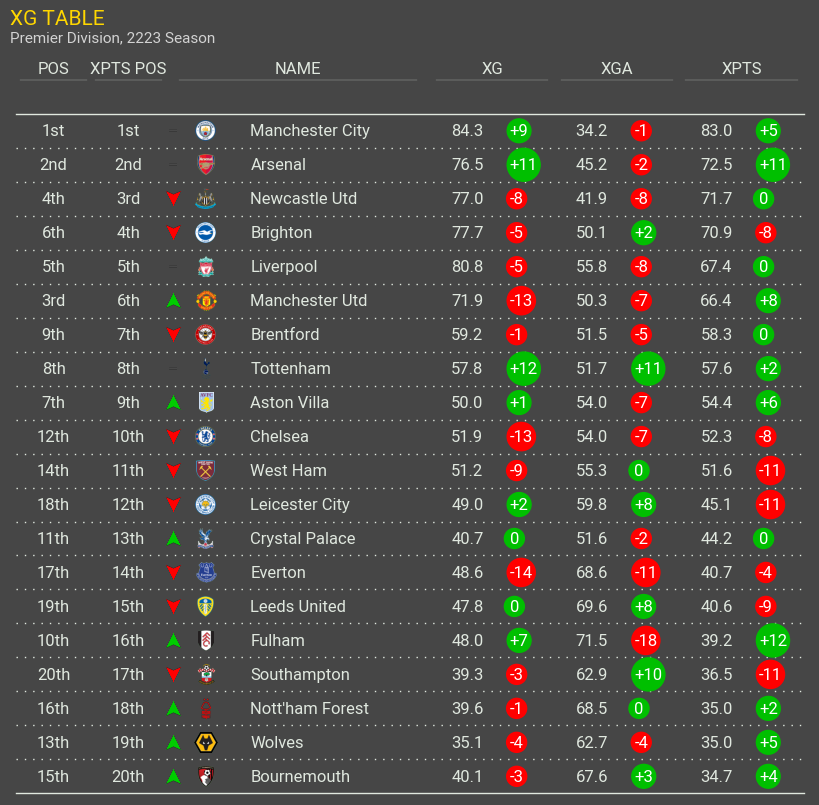

In [802]:
colors = [(1, 0, 0), (0, 0.75, 0)]  # Red to Green
n_bins = 2 # Discretizes the interpolation into bins
cmap_name = 'custom_red_green'
cm = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

def plus_sign_formatter(value):
    return f"+{value:.0f}" if value > 0 else f"{value:.0f}"

col_defs = (
    [
        ColDef(name="POS", title="", group="POS",textprops={"ha": "center", "weight": "bold"}, width=0.3),
        ColDef(name="XPTS POS", title="", group="XPTS POS", textprops={"ha": "center", "weight": "bold"}, width=0.3),
        ColDef(name="POS_NUM_DIFF", title="", group="NAME",textprops={"ha": "center"}, width=0.06,plot_fn=image),
        ColDef(name="TEAM_LOGO", title="", group="NAME",textprops={"ha": "center"}, width=0.2, plot_fn=image),
        ColDef(name="TEAM_NAME", title="",group="NAME",textprops={"ha": "left"}, width=0.8),
        ColDef(name="XG", title="", group="XG",textprops={"ha": "center"}, formatter="{:.1f}", width=0.3),
        ColDef(name="XG_DIFF", title="", group="XG", textprops={"ha": "left","bbox": {"boxstyle": "circle", "pad": 0.15}}, 
               formatter=plus_sign_formatter, width=0.2, cmap=centered_cmap(df["XG_DIFF"], cmap=cm, center=0)),
        ColDef(name="XG_AGAINST", title="", group="XGA",textprops={"ha": "center",}, formatter="{:.1f}", width=0.3),
        ColDef(name="XGA_DIFF", title="", group="XGA",textprops={"ha": "left","bbox": {"boxstyle": "circle", "pad": 0.15}}, 
               width=0.2, formatter=plus_sign_formatter,cmap=centered_cmap(df["XG_DIFF"], cmap=cm, center=0)),
        ColDef(name="TEAM_XPTS", title="", group="XPTS",textprops={"ha": "center"}, formatter="{:.1f}", width=0.3),
        ColDef(name="XPTS_DIFF", title="", group="XPTS",textprops={"ha": "left","bbox": {"boxstyle": "circle", "pad": 0.15}}, 
               width=0.2, formatter=plus_sign_formatter,cmap=centered_cmap(df["XG_DIFF"], cmap=cm, center=0)),
    ]
)

plt.rcParams["font.family"] = ["Roboto"]
plt.rcParams["savefig.bbox"] = "tight"
plt.rcParams["text.color"] = "#e0e8df"

fig, ax = plt.subplots(figsize=(10, 10))

ax.set_title('XG TABLE', fontsize=15, fontweight='bold', color='gold', 
             loc='left',pad=15)

subtitle_y_position = 1.005  # Adjust this value as needed
ax.text(0.0, subtitle_y_position, 'Premier Division, 2223 Season', 
        fontsize=11, color='lightgray', transform=ax.transAxes)

fig.set_facecolor("#464646")
ax.set_facecolor("#464646")

fig.subplots_adjust(top=0.85, bottom=0.1, left=0.1, right=0.9)

table = Table(
    df,
    column_definitions=col_defs,
    row_dividers=True,
    footer_divider=True,
    ax=ax,
    textprops={"fontsize": 12},
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    col_label_divider={"linewidth": 1, "linestyle": (0, (1, 5))},
)

table.autoset_fontcolors(colnames=["XG_DIFF", "XGA_DIFF", "XPTS_DIFF"])